# Simple MNIST convnet

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2015/06/19<br>
**Last modified:** 2020/04/21<br>
**Description:** A simple convnet that achieves ~99% test accuracy on MNIST.

## Setup

In [1]:
import numpy as np
import keras
from keras import layers

## Prepare the data

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the model

In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [10]:
batch_size = 128
epochs = 2

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/2
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9896 - loss: 0.0319 - val_accuracy: 0.9922 - val_loss: 0.0310
Epoch 2/2
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9905 - loss: 0.0295 - val_accuracy: 0.9918 - val_loss: 0.0277


## Evaluate the trained model

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02289794571697712
Test accuracy: 0.9919000267982483


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


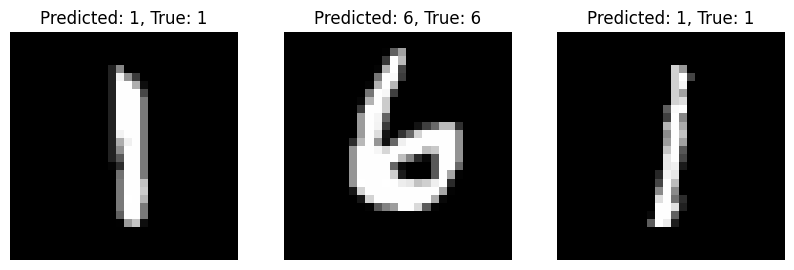

In [12]:
# prompt: generate code to test 3 mnist and show image of it and use model above

import numpy as np
import matplotlib.pyplot as plt

# Select 3 random images from the test set
random_indices = np.random.choice(x_test.shape[0], size=3, replace=False)
random_images = x_test[random_indices]
random_labels = np.argmax(y_test[random_indices], axis=1)  # Get the true labels

# Predict the labels using the trained model
predictions = model.predict(random_images)
predicted_labels = np.argmax(predictions, axis=1)

# Display the images and their predicted labels
plt.figure(figsize=(10, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(random_images[i].reshape(28, 28), cmap="gray")
    plt.title(f"Predicted: {predicted_labels[i]}, True: {random_labels[i]}")
    plt.axis("off")
plt.show()


In [13]:
# prompt: generate me python for detect a PRIME number

def is_prime(n):
  """Checks if a number is prime."""
  if n <= 1:
    return False
  for i in range(2, int(n**0.5) + 1):
    if n % i == 0:
      return False
  return True

# Example usage:
number_to_check = 17
if is_prime(number_to_check):
  print(f"{number_to_check} is a prime number")
else:
  print(f"{number_to_check} is not a prime number")

number_to_check = 10
if is_prime(number_to_check):
  print(f"{number_to_check} is a prime number")
else:
  print(f"{number_to_check} is not a prime number")


17 is a prime number
10 is not a prime number
